In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from matplotlib import rcParams
import pandas as pd
import os
import tqdm

from Models.Higgins1D.Higgins1DConfiguration import Higgins1DConfiguration, Higgins1DTdmaParameters
from Models.Higgins1D.Higgins1DTdmaSolver import integrate_tdma_implicit_scheme
from MathHelpers.InitDataHelpers import get_cos, get_normal_rand
from DataContainers.Experiment import Experiment

%matplotlib inline

In [2]:
if os.uname().sysname == 'Linux':
    !export NUMBA_WARNINGS=0
else:
    !setx NUMBA_WARNINGS 0

In [3]:
plt.style.use('ggplot')
rcParams['figure.figsize'] = (10, 5)

### Система

$$
\Large\left\{\begin{array}{c}
\dot{u}=1-u v+D_{u}\frac{\partial^{2} u}{\partial x^{2}} \\
\dot{v}=p v\left(u-\frac{1+q}{q+v}\right)+D_{v}\frac{\partial^{2} v}{\partial x^{2}}
\end{array}\right..
$$

### Схема

$$
\Large\begin{array}{l}
u_{i, j}+\tau f(u_{i,j}, v_{i,j})=-D_u\frac{\tau}{h^2}u_{i-1,j+1}+(1 + D_u\frac{2 \tau}{h^2})u_{i, j+1} - D_u\frac{\tau}{h^2}u_{i+1,j+1}  \\
v_{i, j}+\tau g(u_{i,j}, v_{i,j})=-D_v\frac{\tau}{h^2}v_{i-1,j+1}+(1 + D_v\frac{2 \tau}{h^2})v_{i, j+1} - D_v\frac{\tau}{h^2}v_{i+1,j+1}
\end{array}
$$

In [4]:
res = Experiment()
res.fill_from_file_Higgins_legacy_format("/home/alexandr/Desktop/aaa/{'p'_ 2.0, 'q'_ 2.0, 'Du'_ 15.2, 'Dv'_ 1} 2020-10-18 18_16_55")

In [5]:
conf = Higgins1DConfiguration(2.0, 2.0, 20.0, 1)
ress = []
for x_max in tqdm.tqdm([1,2,5,10,20,40]):
    for _ in range(1):
        u_init = get_normal_rand(200,1.0, 0.1)
        v_init = get_normal_rand(200,1.0, 0.1)
        params = Higgins1DTdmaParameters(u_init, v_init, 0.005 * x_max, 0.01, 5000.0, True, 100)
        ress.append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████| 6/6 [00:39<00:00,  6.64s/it]


In [11]:
ress[5].save('/home/alexandr/Desktop/aaa')

In [12]:
a = Experiment()

In [13]:
a.fill_from_file('/home/alexandr/Desktop/aaa')

In [23]:
a.model_config

{'p': 2.0, 'q': 2.0, 'Du': 20.0, 'Dv': 1, 'model': 'Higgins'}

In [21]:
a.method_parameters

{'dx': 0.2,
 'dt': 0.01,
 't_max': 5000.0,
 'save_timeline': True,
 'timeline_save_step_delta': 100,
 'method': 'tdma_implicit'}

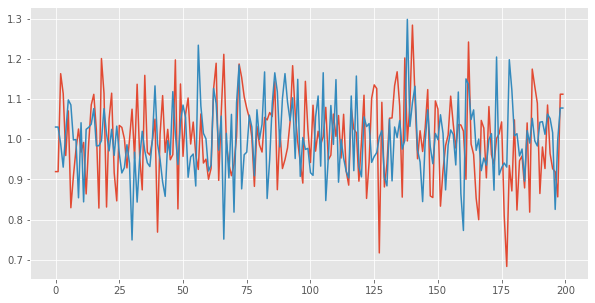

In [16]:
plt.plot(a.init_values['u'])
plt.plot(a.init_values['v'])

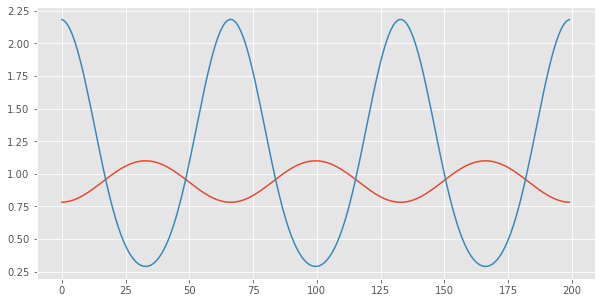

In [17]:
plt.plot(a.end_values['u'])
plt.plot(a.end_values['v'])

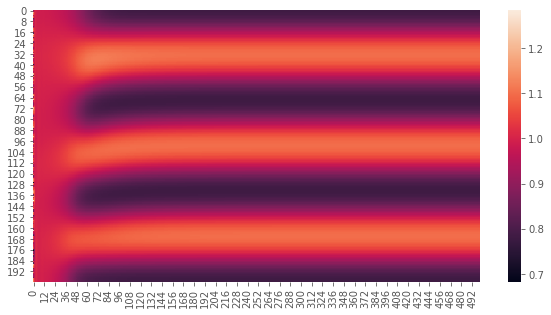

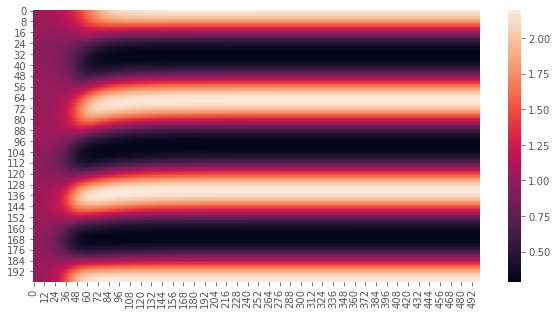

In [20]:
sns.heatmap(a.timelines['u'].T)
plt.show()
sns.heatmap(a.timelines['v'].T)
plt.show()

In [19]:
pcks_100 = pd.DataFrame([calc_picks(p) for p in us_100])
print(f'Уникальные занчения пиковости: {pcks_100["picks"].unique()}')
pcks_100.head(10)

Уникальные занчения пиковости: [8.  8.5 7.5 9. ]


,picks,direction
0,8.0,down
1,8.5,down
2,8.0,up
3,8.5,down
4,8.5,up
5,8.0,down
6,8.0,up
7,7.5,up
8,8.0,up
9,8.5,down


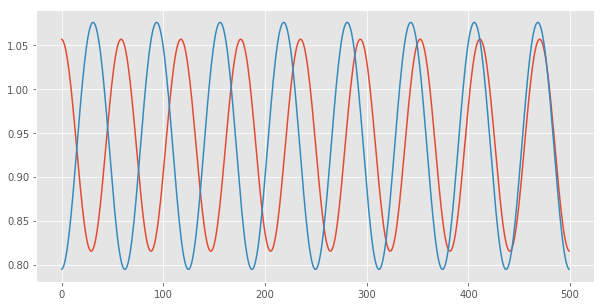

In [20]:
plt.plot(us_100[1]), plt.plot(us_100[0])
plt.show()